# 주제 : 뉴욕에서 방이 둘 딸린 집을 에어비엔비에 내놓으려 한다. 이 때 적당한 숙박료를 구하시오. (5점)
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 New York City Airbnb Open Data를 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    AB_NYC_2019.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    id: 항목의 ID
    name: 항목의 이름 (타이틀)
    host_id: 호스트 ID
    host_name: 호스트의 이름
    neighbourhood_group: 방이 있는 구역 그룹
    neighbourhood: 방이 있는 구역
    latitude: 방이 위치한 위도
    longitude: 방이 위치한 경도
    room_type: 방의 종류
    price: 가격 (미 달러)
    minimum_nights: 최소 숙박 일수
    number_of_reviews: 리뷰의 개수
    last_review: 마지막 리뷰 일자
    reviews_per_month: 월별 리뷰 개수
    calculated_host_listings_count: 호스트가 올린 방 개수
    availability_365: 365일 중 가능한 일수

    
- 데이터 출처: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

## 최종 목표
    - 스크래핑된 dirty 데이터 클리닝 방법 이해
    - 다양한 종류의 데이터 정규화 방법 습득
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. Regression에 대하여

### 선형 회귀에 대하여
Linear Regression: 하나의 값을 추정할때 
여러개 입력된 값 (M개의 feature vector)의 각각의 weight을 곱해 하나의 값을 얻어내려함


### 그 외의 회귀 방법
노트필기

## Step 1. 데이터셋 준비하기

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [15]:
import os

In [18]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'samjinwang'
os.environ['KAGGLE_KEY'] = '50f59f3ee7398d8b54738b567b005831'



### 문제 2. 데이터 다운로드 및 압축 해제하기


In [19]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm *.*
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data
!unzip '*.zip'


rm: cannot remove '*.*': No such file or directory
404 - Not Found
unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [6]:
df = pd.read_csv('AB_NYC_2019.csv')

FileNotFoundError: ignored

In [ ]:
df.head()

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 불필요한 데이터 데이터프레임에서 제거하기


In [ ]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
# 데이터프레임에서 불필요한 컬럼 제거하기
df.head()
#name: 각 집마다 키워드을 잘 적어놓으려고 하고있다 -> 현재는 자연어 처리를 하지 않기 때문에 빼고간다
#host_id : 낮을수록 값이 집의 값이 커짐
#host_name: 크게 의미 없음
#neighbourhodd: 의밍ㅆ음
#latitude, longtitude: neighbourhood 값이 있기때문에 빼고 진행
#



In [ ]:
df['room_type'].value_counts() #의미 있어 보임

In [ ]:
df.info() #last review와 review per month의 숫자가 같다 
#calculated_host_listings_count 숫자 값이니 그냥 남겨둠

In [ ]:
(df['reviews_per_month'].isna() & df['last_review'].isna()).sum() #두개다 True 여야 True

In [ ]:
df['reviews_per_month'].isna().sum() #위에랑 결측값이 같은걸 보니 완전히 겹친다고 본다

In [ ]:
df['availability_365'].hist()

In [ ]:
(df['availability_365'] == 0).sum() #365일중 총 0일 숙박 가능한곳의 숫자 -> 17000개나됨 -> 결측값들임

In [ ]:
df.isna().sum() #review가 있는 경우랑 없는경우로 나눠서 쓰기로 함

In [ ]:
df.describe()
#host_id 값들의 차이가 많이 남
#price의 경우 min 이 0 max 10000 잘못 들어간 값으로 추정됨
#minimum_night : max가 1250인게 좀 이상함
#number of review : min이 0이다
#availability: max가 365인건 말이 되지만 min이 0인건 값이 입력 안됐다고 보여짐

In [ ]:
(df['number_of_reviews']==0).sum() # 다른 review 데이터랑 겹치는듯

In [ ]:
df.columns

In [ ]:
df.drop(['id', 'name', 'host_name', 'latitude', 'longitude'], axis = 1, inplace = True)

In [ ]:
df.head()

### 문제 5. 수치형 데이터와 Price의 Jointplot 분석하기


In [ ]:
df.columns

In [ ]:
sns.jointplot(x='host_id', y = 'price',data =df, kind = 'hex') #상관성이 매우 적음! -> 수치형 데이터 클리닝후 다시 볼 필요가 있다 

In [ ]:
sns.jointplot(x='reviews_per_month', y = 'price',data =df, kind = 'hex') #이것도 아래에 몰려있음 -> price가 아웃라이어가 많기 때문일듯 -> 데이터 클리닝 해야할듯

### 문제 6. 수치형 데이터와 Price의 상관성 분석하기

In [ ]:
sns.heatmap(df.corr(),annot = True, cmap = 'YlOrRd')
#price와의 상관성이 모든 컬럼에서 매우 낮게 나타남

#host_id와 review per month의 상관성이 높음 -> 숫자가 높은 호스트 (최근호스트)일 수록 월별평이 많다는것
#그에 비해 number of reviews는 상관관계가 낮음 -> 숫자가 높은 호스트가 전체 리뷰수는 적을수 밖에 없기 때문
#host_id와 calculated_host_listing_count -> 상관성이 있는편 -> 나중에 들어온 호스트가 집을 더 가진 확률이 높다

### 문제 7. 범주형 데이터와 Price의 Boxplot 계열 및 Histogram 분석하기

In [ ]:
sns.boxplot(x = 'neighbourhood_group', y = 'price', data = df) #아웃라이어가 많아 보기 힘듬

In [7]:
sns.boxplot(x = 'room_type', y = 'price', data = df) #마찬가지

NameError: ignored

## Step 3. 데이터 클리닝 수행하기

### 문제 8. 미기입, 오기입 데이터 확인하기

In [8]:
# 각 컬럼을 분석하여 미기입/오기입된 데이터 확인하기
# Hint) 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts()등으로 확인
df.columns

NameError: ignored

In [ ]:
df.isna().sum() #미기입 데이터 확인

In [9]:
df['neighbourhood_group'].value_counts() #5개의 클래스

NameError: ignored

In [10]:
neigh = df['neighbourhood'].value_counts()
plt.plot(range(len(neigh)),neigh)  #50개 기준으로 끊어주면 좋을 것 같다

NameError: ignored

In [ ]:
df['neighbourhood'] = df['neighbourhood'].apply(lambda s:s if str(s) not in neigh[50:] else 'others') #50개기준으로 기타와 네이버로 나눠줌

In [ ]:
df['neighbourhood'].value_counts() #50개이상인 범주만 남게되었다 -> 많은편이긴하지만 갯수가 많은 범주형데이터가 이것뿐이고 중요한 요소라 판단되어 가져간다

others                       6248
Williamsburg                 3920
Bedford-Stuyvesant           3714
Harlem                       2658
Bushwick                     2465
Upper West Side              1971
Hell's Kitchen               1958
East Village                 1853
Upper East Side              1798
Crown Heights                1564
Midtown                      1545
East Harlem                  1117
Greenpoint                   1115
Chelsea                      1113
Lower East Side               911
Astoria                       900
Washington Heights            899
West Village                  768
Financial District            744
Flatbush                      621
Clinton Hill                  572
Long Island City              537
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Murray Hill                   485
Kips Bay                      470
Flushing                      426
Ridgewood     

In [ ]:
df['room_type'].value_counts() #종류가 별로 없어서 일단 놔둔다

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

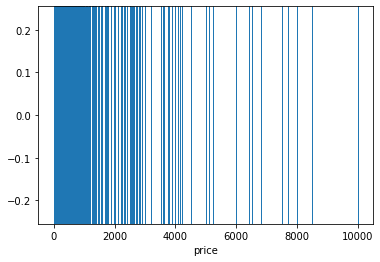

In [ ]:
############수치형#################
sns.rugplot(x = 'price',data = df, height = 1) #2000에 많이 몰려있지만, 6000 이상에도 꽤 값들이 있다

In [ ]:
df['price'].quantile(0.95) # 상위 1프로 값이 355불임 -> 사실상 800이상인 값들은 러그플랏에서 보이는거와 달리 극소수 갯수일뿐임
df['price'].quantile(0.005) # 하위 0.5프로 값 26불 -> 잘라준다 -> 통계를 통해 본 min 값이 0인것도 있어서 제거해줘야함 (숙박비가 0원인게 말이안됨)

26.0

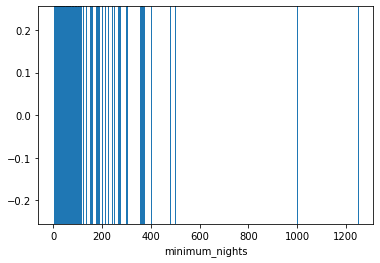

In [ ]:
sns.rugplot(x = 'minimum_nights',data = df, height = 1)

In [ ]:
df['minimum_nights'].quantile(0.98) # 상위 5프로, 상위 2프로 다 30일 -> 상위 2프로 날려버린다
df['minimum_nights'].quantile(0.005) # 하위 0.5프로 1일 -> 어차피 min값이 1이니까 하위값은 자를필요 없어보임

1.0

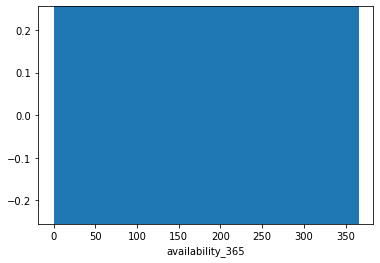

In [ ]:
sns.rugplot(x = 'availability_365',data = df, height = 1)

In [ ]:
df['availability_365'].quantile(0.98) #365일 -> 365일 다되는 집이 많은편이라 안잘라도 될듯
df['availability_365'].quantile(0.30) #상위 30프로까지도 0일임 -> 그냥 그대로 0으로 두고 이게 0인지 아닌지를 표기하는 추가적인 범주형 데이터를 만들면 좋을것같다

0.0

### 문제 9. 아웃라이어를 제거하고 통계 재분석하기

In [ ]:
# quantile(), drop() 등 메소드를 이용하여 outlier 제거하고 통계 재분석하기
p1 = df['price'].quantile(0.95)
p2 = df['price'].quantile(0.005)
print(p1,p2)

df = df[(df['price']<p1)&(df['price']>p2)]



355.0 26.0


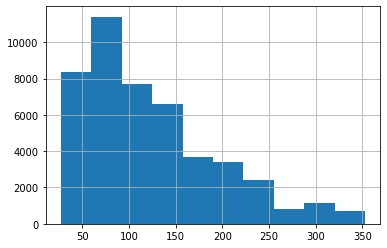

In [ ]:
df['price'].hist() #완전 가우시안 형태는 아니지만 그래도 나름 용이하게 쓸수있는 모양


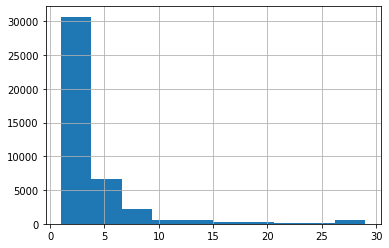

In [ ]:
m1 = df['minimum_nights'].quantile(0.95)
print(m1) #위에 price에서 제거되는과정에서 변경됏을수도 있으니 확인해본다
df = df[df['minimum_nights']<m1]
df['minimum_nights'].hist() #값이 큰것들을 날려준것이 확인됨

In [ ]:
df['is_avail_zero'] = df['availability_365'].apply(lambda x: 'Zero' if x ==0 else 'Nonzero') #카테고리컬 데이터 생성

### 문제 10. 미기입 데이터 처리하기

In [ ]:
# fill(), dropna() 등으로 미기입된 데이터를 처리하기
df['review_exists'] = df['reviews_per_month'].isna().apply(lambda x : 'New' if x is True else 'Old')
# 값이 있으면(달별 리뷰가 있으면) True -> 'New' 호스트로 명명해줌 반대는 'Old'



In [ ]:
df.fillna(0,inplace = True) #review_per_month에 여전히 결측값이 존재 -> 리뷰 0건으로 세팅

In [ ]:
df.isna().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
is_avail_zero                     0
review_exists                     0
dtype: int64

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 11. get_dummies를 이용한 범주형 데이터 전처리

In [1]:
df.columns

NameError: ignored

In [ ]:
X_cat = df[['neighbourhood_group','neighbourhood','room_type','is_avail_zero','review_exists']]
X_cat = pd.get_dummies(X_cat) #ohe hot vector 화 하기





### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
scaler = StandardScaler()
X_num = df.drop(['price','neighbourhood_group','neighbourhood','room_type','last_reivew','is_avail_zero','review_exists'], axis = 1)

scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns = X_num.columns)

X = pd.concat([X_scaled,X_cat], axis = 1)
y = df['price']

In [ ]:
X.head()

### 문제 13. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## Step 5. Regression 모델 학습하기

### 문제 14. XGBoost Regression 모델 학습하기

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)




### 문제 15. 모델 학습 결과 평가하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred)) # 35.37 
print(sqrt(mean_squared_error(y_test, pred))) # 49.39

## Step 6. 모델 학습 결과 심화 분석하기


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


In [20]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기

plt.scatter(x=y_test, y=pred)
plt.plot([0,350],[0,350], 'r-')
#일정구간마다 세로로 일자인 데이터들이있다 -> 수치형데이터가 상관성이 적어 범주형 데이터에 의존해서 그런듯
#값이 낮은집을 좀 고평가하는 경향



NameError: ignored

### 문제 17. 에러 값의 히스토그램 확인하기


In [ ]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test) / y_test #에러율
sns.histplot(err)
plt.grid() #0보다 낮게 치우치지만 오른쪽으로 길게 늘어져 있음 -> 최소한 값을 양으로 뽑기때메 에러가 100프로는 갈수가 없다




In [ ]:
err = (pred - y_test)#에러율
sns.histplot(err)
plt.grid() #많은 값이 50불 이내로 overestimated 함

#쓸법한 정보들 -> airbnb에 등록된 이름 -> 특이한 단어들이 많이쓰임 -> 이름을 분석하여 하면 좋을듯
#-> 위도/경도를 지도에 뿌려보고 neighbour랑 잘 엮어서 써보기도 하면 좋을듯